# **Step 1: Install and Import Necessary Libraries**

In [38]:
!pip install librosa
!pip install scikit-learn
!pip install matplotlib

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# **Step 2: Load the Audio Files**


In [39]:
from google.colab import files
uploaded = files.upload()

# Replace 'lion_growl.wav' and 'horse.wav' with the names of your uploaded files
lion_path = 'lion_growl.wav'
horse_path = 'horse.wav'


Saving lion_growl.wav to lion_growl.wav
Saving horse.wav to horse.wav


# **Step 3: Read Audio Data and Extract Features**

In [40]:
# Reading audio files and extracting MFCCs
def extract_features(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    return mfccs

lion_mfccs = extract_features(lion_path)
horse_mfccs = extract_features(horse_path)

# Combining features for clustering
features = np.concatenate((lion_mfccs, horse_mfccs), axis=1).T

# **Step 4: Preprocess Data and Perform Clustering**

In [41]:
# Data preprocessing - Standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **Step 5: Plotting Wave, Spectrogram, and MFCCs**

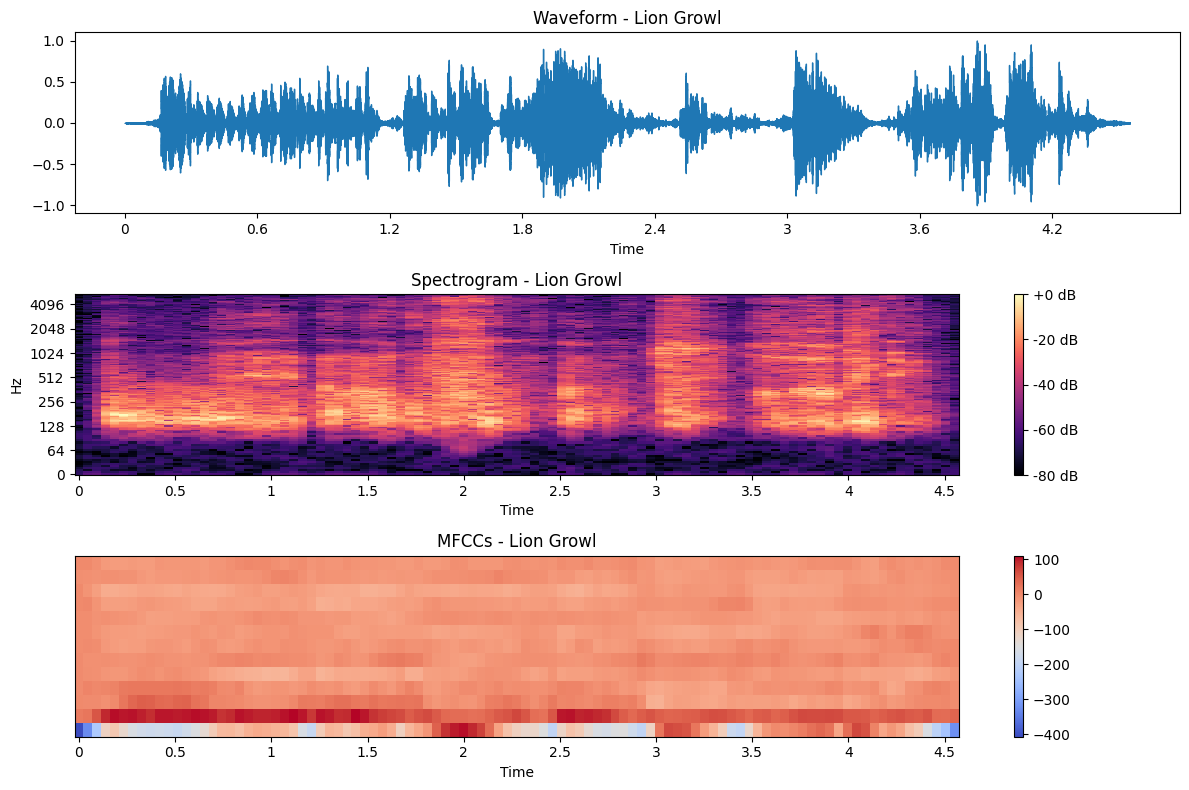

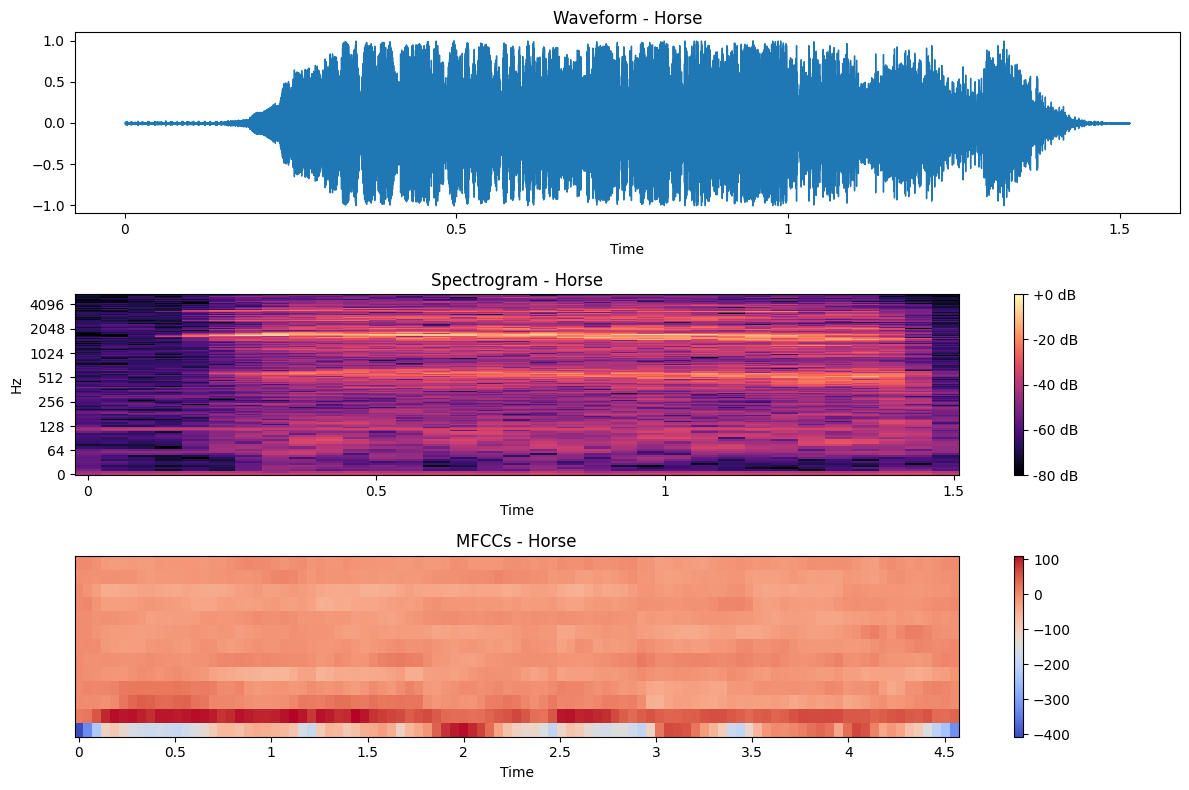

In [42]:
def plot_audio_analysis(file_path, title):
    audio, sr = librosa.load(file_path, sr=None)

    # Plotting Waveform
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f'Waveform - {title}')

    # Plotting Spectrogram
    plt.subplot(3, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {title}')

    # Plotting MFCCs
    plt.subplot(3, 1, 3)
    librosa.display.specshow(lion_mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCCs - {title}')
    plt.tight_layout()
    plt.show()

plot_audio_analysis(lion_path, 'Lion Growl')
plot_audio_analysis(horse_path, 'Horse')